<a href="https://colab.research.google.com/github/nairaanish/flower_classification/blob/master/Flower_Classification_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin= URL, 
                                   fname="flower_photos.tgz", 
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228818944/228813984 [==============================] - 2s 0us/step


In [0]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [5]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [0]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [0]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [8]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, 
                                               directory=train_dir, 
                                               shuffle=True, 
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2935 images belonging to 5 classes.


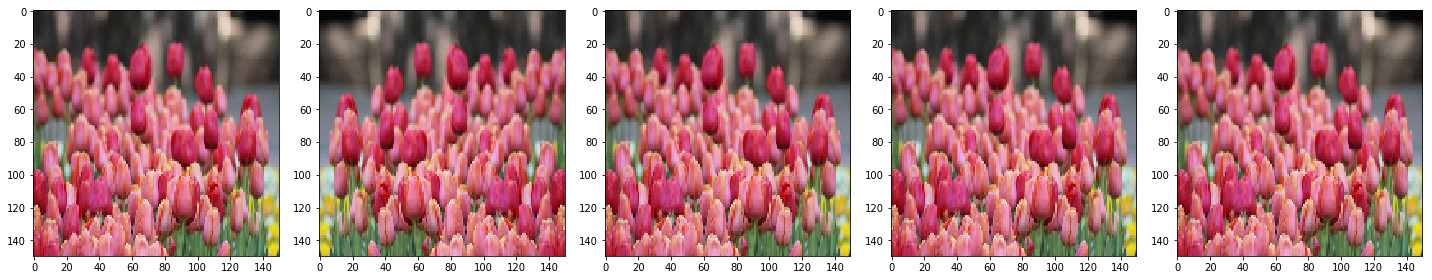

In [9]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [10]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, 
                                               directory=train_dir, 
                                               shuffle=True, 
                                               target_size=(IMG_SHAPE, IMG_SHAPE))


Found 2935 images belonging to 5 classes.


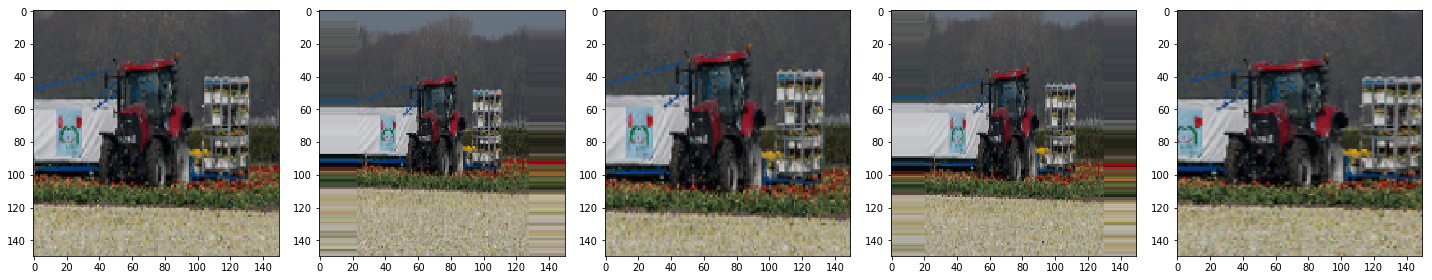

In [11]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [12]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, 
                                               directory=train_dir, 
                                               shuffle=True, 
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2935 images belonging to 5 classes.


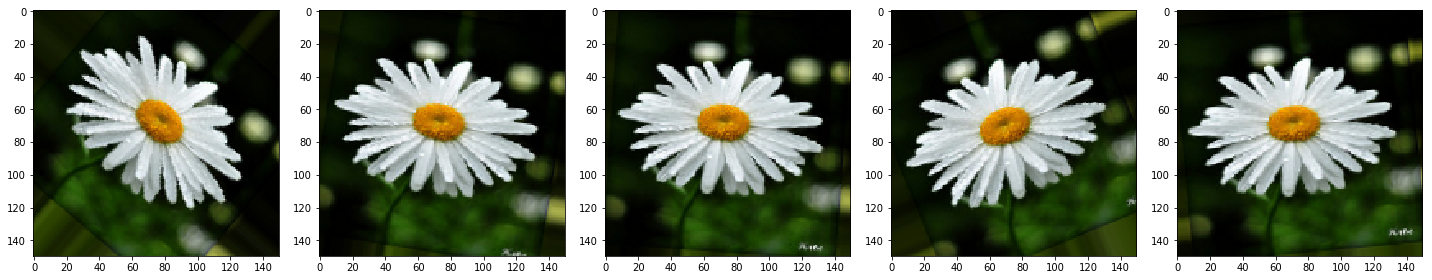

In [13]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [14]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.15,
      height_shift_range=0.15,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE, 
                                                     directory=train_dir, 
                                                     shuffle=True, 
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='sparse')

Found 2935 images belonging to 5 classes.


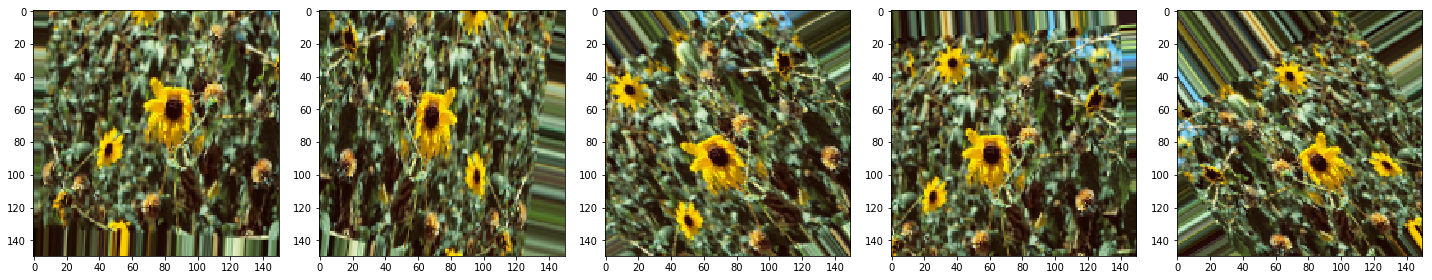

In [15]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [16]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE, 
                                                 directory=val_dir, 
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 735 images belonging to 5 classes.


In [17]:
#Creating the model

conv1 = tf.keras.layers.Conv2D(16, 3, activation = 'relu', input_shape = (150, 150, 3))
pool1 = tf.keras.layers.MaxPooling2D(2,2)

conv2 = tf.keras.layers.Conv2D(32, 3, activation = 'relu')
pool2 = tf.keras.layers.MaxPooling2D(2,2)

conv3 = tf.keras.layers.Conv2D(64, 3, activation = 'relu')
pool3 = tf.keras.layers.MaxPooling2D(2,2)

flatten = tf.keras.layers.Flatten()
drop1 = tf.keras.layers.Dropout(0.2)
hidden = tf.keras.layers.Dense(512, activation = 'relu')
drop2 = tf.keras.layers.Dropout(0.2)
output = tf.keras.layers.Dense(5, activation = 'softmax')

W0710 05:36:15.372674 139857622005632 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
#Model
model = tf.keras.models.Sequential([conv1, pool1, conv2, pool2, conv3, pool3, flatten, hidden, output])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [0]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [22]:
epochs = 80

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(BATCH_SIZE)))
)

Epoch 1/80
30/30 [==============================] - 28s 917ms/step - loss: 1.3625 - acc: 0.4194 - val_loss: 1.0916 - val_acc: 0.5374
Epoch 2/80
30/30 [==============================] - 26s 868ms/step - loss: 1.0700 - acc: 0.5629 - val_loss: 1.1021 - val_acc: 0.5741
Epoch 3/80
30/30 [==============================] - 26s 865ms/step - loss: 1.0155 - acc: 0.6119 - val_loss: 1.0410 - val_acc: 0.5932
Epoch 4/80
30/30 [==============================] - 26s 868ms/step - loss: 0.9460 - acc: 0.6351 - val_loss: 0.9979 - val_acc: 0.6041
Epoch 5/80
30/30 [==============================] - 26s 868ms/step - loss: 0.9021 - acc: 0.6528 - val_loss: 0.9169 - val_acc: 0.6299
Epoch 6/80
30/30 [==============================] - 26s 861ms/step - loss: 0.8566 - acc: 0.6637 - val_loss: 0.9325 - val_acc: 0.6463
Epoch 7/80
30/30 [==============================] - 26s 867ms/step - loss: 0.8449 - acc: 0.6637 - val_loss: 0.9462 - val_acc: 0.6327
Epoch 8/80
30/30 [==============================] - 26s 864ms/step - 

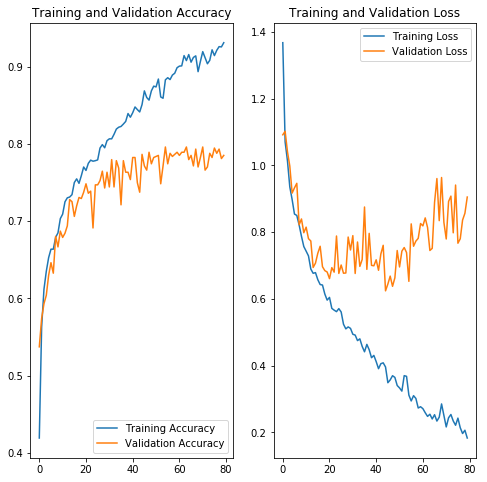

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()